# **1. Data Preprocessing:**


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. preprocessing import LabelEncoder,OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn. utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import silhouette_score, davies_bouldin_score
import joblib
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Load Datasets
train=pd.read_csv("/content/drive/MyDrive/GUVI/Miniproject4/data/train_data.csv")
test=pd.read_csv("/content/drive/MyDrive/GUVI/Miniproject4/data/test_data.csv")
print("Train Shape:",train.shape)
print("Test Shape:",test.shape)


Train Shape: (132379, 14)
Test Shape: (33095, 14)


In [3]:
train_df = train.copy()
test_df = test.copy()
# Handling missing values

num_cols = train_df.select_dtypes(include=['float64','int64']).columns
cat_cols = train_df.select_dtypes(include=['object']).columns

# Fill numerical missing values with median
for col in num_cols:
    if train_df[col].isnull().sum() > 0:
        train_df[col].fillna(train_df[col].median(), inplace=True)
    if test_df[col].isnull().sum() > 0:
        test_df[col].fillna(test[col].median(), inplace=True)

# Fill categorical missing values with mode
for col in cat_cols:
    if train_df[col].isnull().sum() > 0:
        train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    if test_df[col].isnull().sum() > 0:
        test_df[col].fillna(test_df[col].mode()[0], inplace=True)

# Check for any remaining missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

year                    0
month                   0
day                     0
order                   0
country                 0
session_id              0
page1_main_category     0
page2_clothing_model    0
colour                  0
location                0
model_photography       0
price                   0
price_2                 0
page                    0
dtype: int64
year                    0
month                   0
day                     0
order                   0
country                 0
session_id              0
page1_main_category     0
page2_clothing_model    0
colour                  0
location                0
model_photography       0
price                   0
price_2                 0
page                    0
dtype: int64


In [4]:
# Remove duplicate rows from the train dataset
train_before = train_df.shape[0]
train_df = train_df.drop_duplicates()
train_after = train_df.shape[0]
print(f"Removed {train_before - train_after} duplicate rows from train.")

# Remove duplicate rows from the test dataset
test_before = test_df.shape[0]
test_df = test_df.drop_duplicates()
test_after = test_df.shape[0]
print(f"Removed {test_before - test_after} duplicate rows from test.")

Removed 0 duplicate rows from train.
Removed 0 duplicate rows from test.


# **2. Exploratory Data Analysis (EDA):**


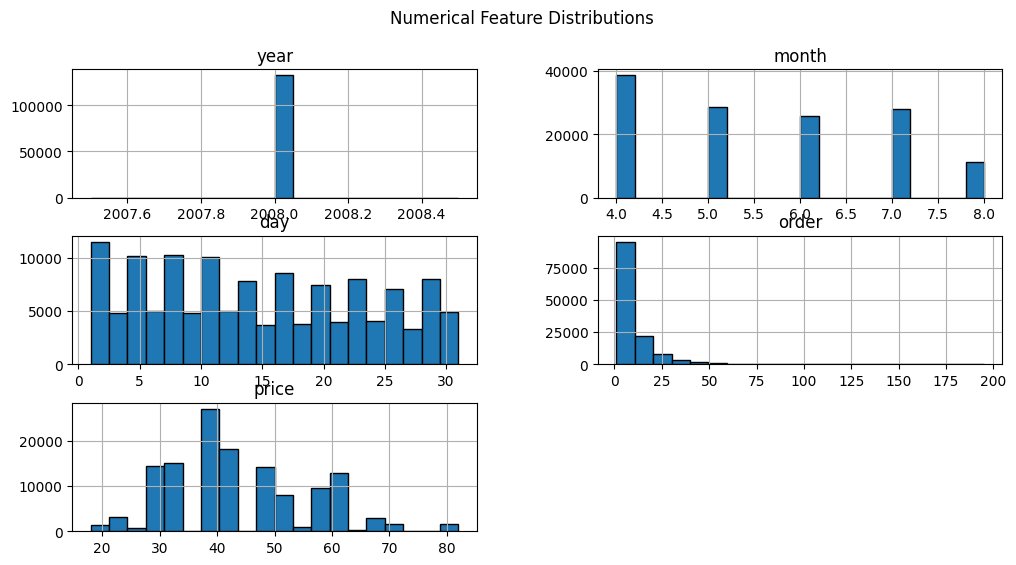

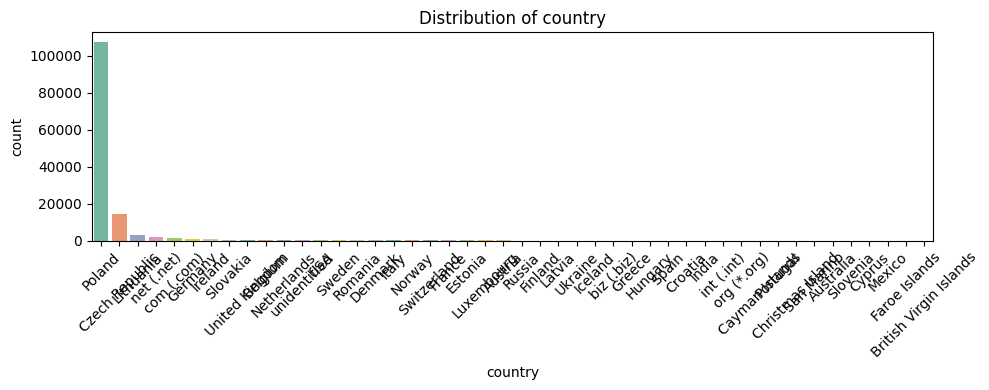

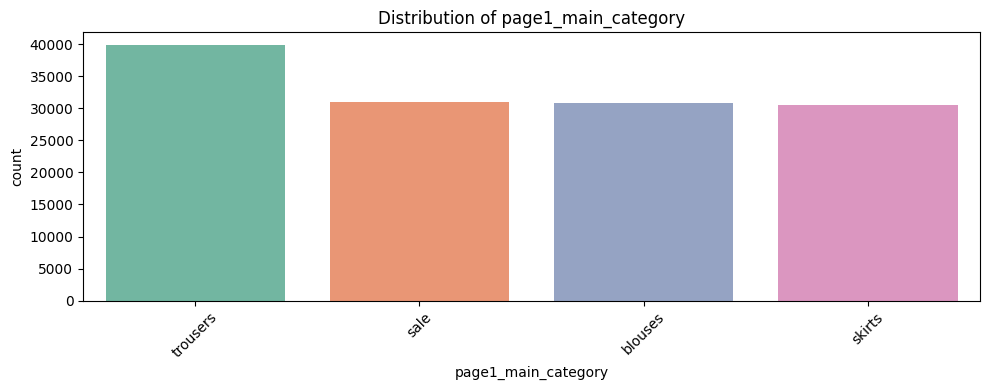

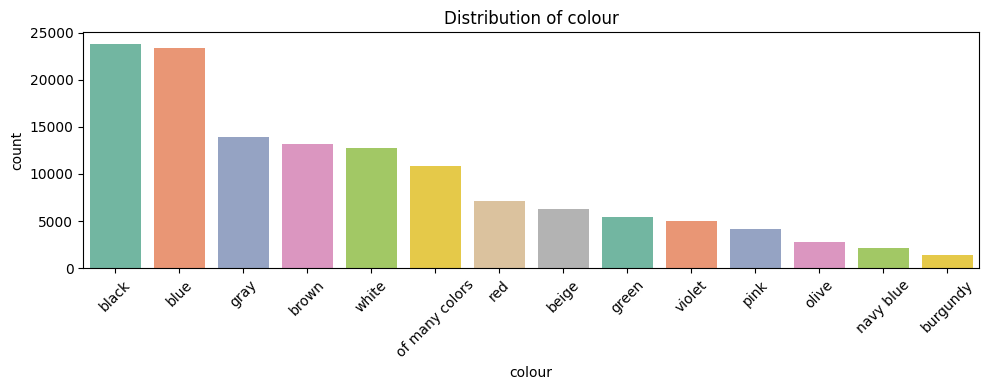

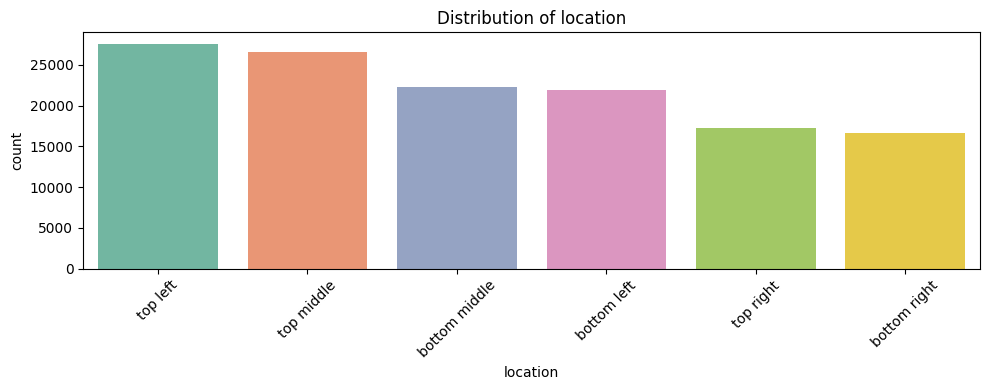

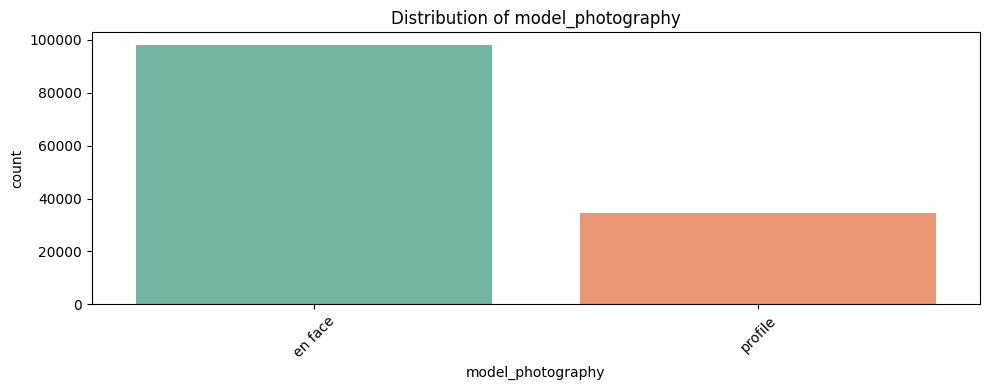

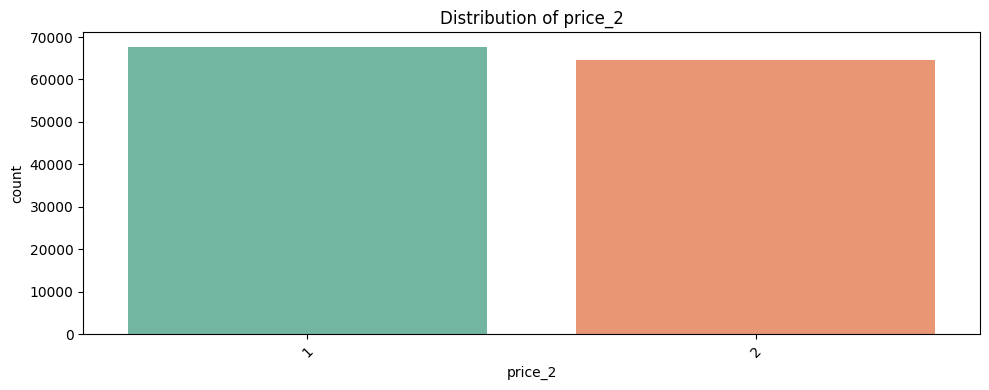

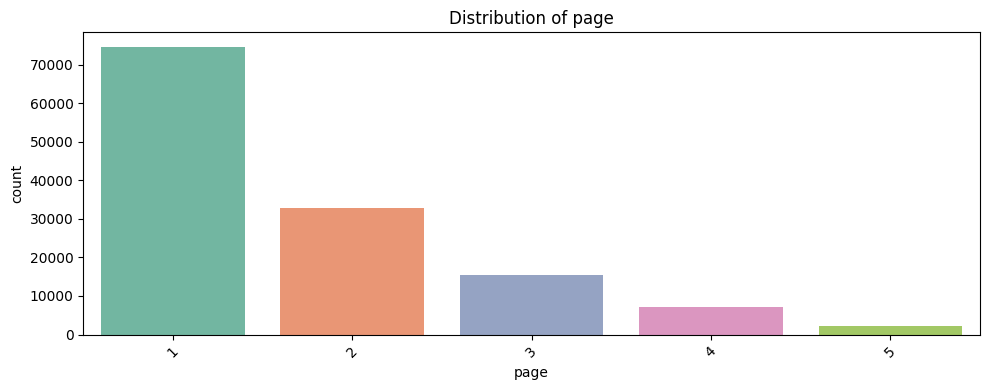

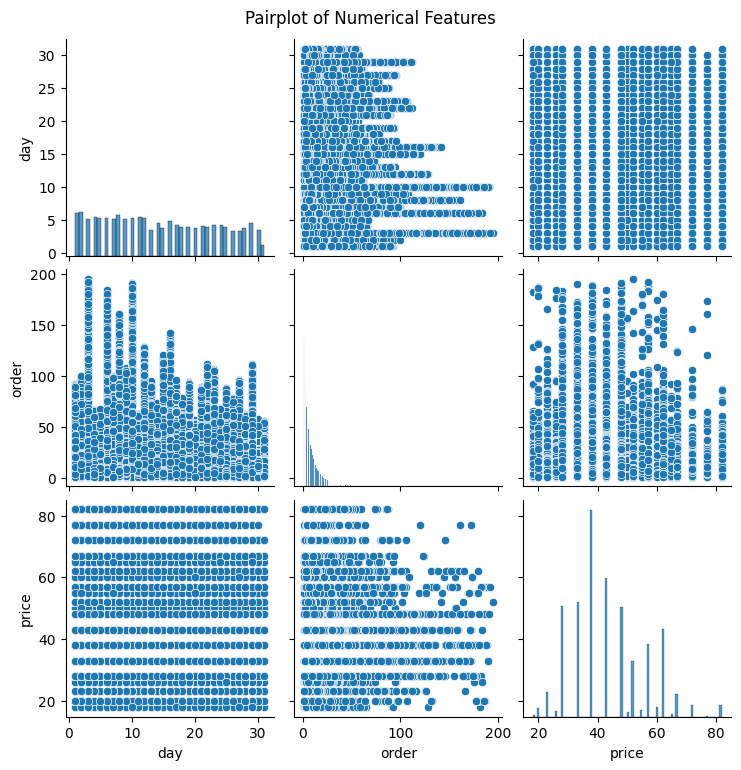

In [5]:
#Visualizations
# Copy train data for EDA
eda_df = train.copy()

# Mapping dictionaries
country_map = {
    1: "Australia", 2: "Austria", 3: "Belgium", 4: "British Virgin Islands", 5: "Cayman Islands",
    6: "Christmas Island", 7: "Croatia", 8: "Cyprus", 9: "Czech Republic", 10: "Denmark",
    11: "Estonia", 12: "unidentified", 13: "Faroe Islands", 14: "Finland", 15: "France",
    16: "Germany", 17: "Greece", 18: "Hungary", 19: "Iceland", 20: "India", 21: "Ireland",
    22: "Italy", 23: "Latvia", 24: "Lithuania", 25: "Luxembourg", 26: "Mexico", 27: "Netherlands",
    28: "Norway", 29: "Poland", 30: "Portugal", 31: "Romania", 32: "Russia", 33: "San Marino",
    34: "Slovakia", 35: "Slovenia", 36: "Spain", 37: "Sweden", 38: "Switzerland", 39: "Ukraine",
    40: "United Arab Emirates", 41: "United Kingdom", 42: "USA", 43: "biz (.biz)", 44: "com (.com)",
    45: "int (.int)", 46: "net (.net)", 47: "org (*.org)"
}
page1_map = {1: "trousers", 2: "skirts", 3: "blouses", 4: "sale"}
colour_map = {1:"beige",2:"black",3:"blue",4:"brown",5:"burgundy",6:"gray",7:"green",
              8:"navy blue",9:"of many colors",10:"olive",11:"pink",12:"red",13:"violet",14:"white"}
location_map = {1:"top left",2:"top middle",3:"top right",4:"bottom left",
                5:"bottom middle",6:"bottom right"}
model_photo_map = {1:"en face",2:"profile"}

# Apply mappings
eda_df['country'] = eda_df['country'].map(country_map)
eda_df['page1_main_category'] = eda_df['page1_main_category'].map(page1_map)
eda_df['colour'] = eda_df['colour'].map(colour_map)
eda_df['location'] = eda_df['location'].map(location_map)
eda_df['model_photography'] = eda_df['model_photography'].map(model_photo_map)

# Define columns to visualize
num_cols = ['year', 'month', 'day', 'order', 'price']
cat_cols = ['country', 'page1_main_category', 'colour', 'location', 'model_photography', 'price_2', 'page']

# 1. Histograms for numerical features
eda_df[num_cols].hist(figsize=(12,6), bins=20, edgecolor='black')
plt.suptitle("Numerical Feature Distributions")
plt.show()

# 2. Bar plots for categorical features
for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=eda_df, x=col, order=eda_df[col].value_counts().index, palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

# 3. Pairplot for selected numerical features
selected_num = ['day', 'order', 'price']
sns.pairplot(eda_df[selected_num])
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


In [6]:
#Session Analysis:
# Session Duration
session_duration = eda_df.groupby('session_id')['order'].max()
# Page Views per Session
page_views = eda_df.groupby('session_id').size()
# Bounce Rate: percentage of sessions with only one page view
num_sessions = page_views.count()
num_bounces = (page_views == 1).sum()
bounce_rate = num_bounces / num_sessions
# Display metrics
print(f'Average Session Duration (in clicks): {session_duration.mean():.2f}')
print(f'Average Page Views per Session: {page_views.mean():.2f}')
print(f'Bounce Rate: {bounce_rate:.2%}')

Average Session Duration (in clicks): 6.98
Average Page Views per Session: 5.78
Bounce Rate: 23.72%


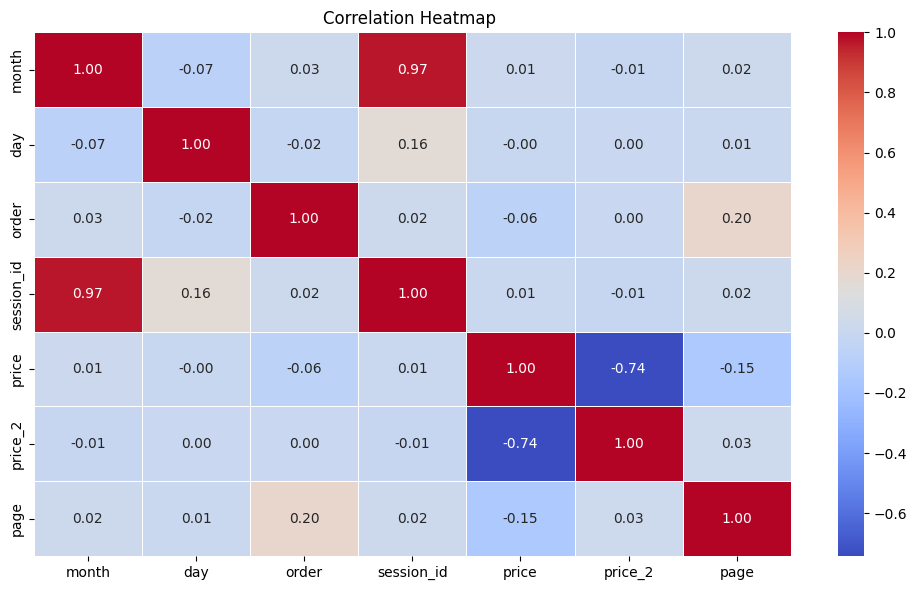

In [7]:
#Correlation Analysis:
# Select only numeric columns for correlation analysis
numeric_cols = eda_df.select_dtypes(include=['int64', 'float64']).columns

# Drop constant columns (with only one unique value)
variable_numeric_cols = [col for col in numeric_cols if eda_df[col].nunique() > 1]

# Calculate the correlation matrix
corr_matrix = eda_df[variable_numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap ")
plt.tight_layout()
plt.show()

In [8]:
#Time-based Analysis:
# Construct a datetime column from year, month, day
eda_df['date'] = pd.to_datetime(eda_df[['year', 'month', 'day']])

# Extract day of the week (0=Monday, 6=Sunday)
eda_df['day_of_week'] = eda_df['date'].dt.dayofweek
eda_df['day_name'] = eda_df['date'].dt.day_name()

# (Optional) Extract month name as well for analysis/plotting
eda_df['month_name'] = eda_df['date'].dt.month_name()

# See the new columns
print(eda_df[['date', 'day_of_week', 'day_name', 'month_name']].head())

        date  day_of_week day_name month_name
0 2008-06-22            6   Sunday       June
1 2008-05-19            0   Monday        May
2 2008-07-15            1  Tuesday       July
3 2008-05-02            4   Friday        May
4 2008-06-09            0   Monday       June


# **3. Feature Engineering:**


In [9]:
#Session Metrics:
# Calculate the number of clicks per session (session length)
session_length = train_df.groupby('session_id').size().rename('session_length').reset_index()

# Merge session length back into the DataFrame
train_df = train_df.merge(session_length, on='session_id')

#  Preview the new column
print(train_df[['session_id', 'session_length']].head())

   session_id  session_length
0       15648              84
1       10018               9
2       19388              10
3        7181               6
4       13493              15


In [10]:
# Number of clicks per session
clicks_per_session = train_df.groupby('session_id').size().rename('num_clicks').reset_index()

# View sample
print(clicks_per_session.head())

   session_id  num_clicks
0           1           8
1           2           9
2           3           3
3           4           4
4           5           1


In [11]:
#time spent per product category.
# Count of clicks per session_id, per page1_main_category
cat_clicks = (
    train_df
    .groupby(['session_id', 'page1_main_category'])
    .size()
    .rename('num_clicks_category')
    .reset_index()
)

#  Average number of clicks per category across all sessions
cat_engagement = cat_clicks.groupby('page1_main_category')['num_clicks_category'].mean().sort_values(ascending=False)
print(cat_engagement)

page1_main_category
4    3.619949
1    3.288894
3    3.139447
2    2.887368
Name: num_clicks_category, dtype: float64


In [12]:
#Clickstream Patterns:
train_df = train_df.sort_values(['session_id', 'order'])

# For each session, get the list of categories browsed in order (the clickstream path)
clickstream_paths = (
    train_df.groupby('session_id')['page1_main_category']
    .apply(list)
    .rename('clickstream_path')
    .reset_index()
)

# Preview a few results
print(clickstream_paths.head())

# Merge back to main dataframe
train_df = train_df.merge(clickstream_paths, on='session_id')

   session_id             clickstream_path
0           1     [1, 2, 2, 2, 3, 3, 4, 4]
1           2  [2, 2, 2, 1, 1, 2, 4, 4, 4]
2           3                    [2, 3, 3]
3           4                 [1, 1, 3, 3]
4           5                          [3]


In [13]:
#Behavioral Metrics:
#Bounce rates
# Calculate number of clicks per session
session_lengths = train_df.groupby('session_id').size().rename('session_length')
# Bounce sessions
bounces = session_lengths[session_lengths == 1].index

# Mark each row if session was a bounce
train_df['is_bounce'] = train_df['session_id'].isin(bounces)

# Overall bounce rate
bounce_rate = len(bounces) / session_lengths.shape[0]
print(f"Overall Bounce Rate: {bounce_rate:.2%}")

# Bounce rate per category (category of only page in bounce session)
bounce_category = train_df[train_df['is_bounce']].groupby('page1_main_category').size() / train_df.groupby('page1_main_category')['session_id'].nunique()
print("Bounce rate per category:\n", bounce_category)

Overall Bounce Rate: 23.72%
Bounce rate per category:
 page1_main_category
1    0.148240
2    0.148697
3    0.121471
4    0.101028
dtype: float64


In [14]:
#exit rates
# Identify the last clicked category in each session
train_df['is_last_click'] = train_df.groupby('session_id')['order'].transform('max') == train_df['order']

# For each category, what fraction of sessions ended with it?
exit_ct = train_df[train_df['is_last_click']].groupby('page1_main_category')['session_id'].nunique()
total_ct = train_df.groupby('page1_main_category')['session_id'].nunique()
exit_rate = (exit_ct / total_ct).fillna(0)

print("Exit rate per category:\n", exit_rate)

Exit rate per category:
 page1_main_category
1    0.527908
2    0.545317
3    0.532704
4    0.640738
Name: session_id, dtype: float64


In [15]:
#revisit patterns
# For each session, track if any revisit (duplicated) in category
def has_revisit(group):
    return group['page1_main_category'].duplicated().any()

session_revisit = train_df.groupby('session_id').apply(has_revisit)
revisit_rate = session_revisit.mean()
print(f"Fraction of sessions with category revisit: {revisit_rate:.2%}")

Fraction of sessions with category revisit: 70.37%


# **4. Feature Encoding:**

In [16]:
#  Define the Aggregation Rules (Constant for Train and Test)
AGG_RULES = {
    'order': 'max',
    'country': 'first',
    'page1_main_category': lambda x: x.mode().iloc[0] if not x.mode().empty else 1,
    'colour': lambda x: x.mode().iloc[0] if not x.mode().empty else 1,
    'price': 'sum',                          # Regression Target
    'price_2': 'max',                        # CLASSIFICATION TARGET (Aggregated)
    'model_photography': 'first'
}

# CORE PROCESSING FUNCTION
def process_and_encode_data(df):
    """Aggregates clickstream data, generates targets, and performs label/OHE."""

    # 1. Aggregation
    df_session = df.groupby('session_id').agg(AGG_RULES).reset_index()

    df_session.rename(columns={
        'order': 'total_clicks',
        'price': 'session_revenue',
        'page1_main_category': 'main_category_mode'
    }, inplace=True)

    # 2. Target Definition
    # Map: 1 ('Yes, saw high price') -> 1, 2 ('No') -> 0
    df_session['price_2'] = df_session['price_2'].map({2: 0, 1: 1})

    # 3. Label Encoding for remaining binary features
    df_session['model_photography'] = df_session['model_photography'].map({2: 0, 1: 1})

    # 4. One-Hot Encoding
    nominal_cols = ['country', 'main_category_mode', 'colour']
    df_encoded = pd.get_dummies(df_session, columns=nominal_cols, drop_first=True)

    df_encoded.drop(columns=['session_id'], inplace=True)

    return df_encoded


#  RUNNING ON TRAINING DATA
df_encoded_train = process_and_encode_data(train_df)
TRAIN_COLS = df_encoded_train.columns.tolist()

# **5. Train–Test Split:**


In [17]:
# X: Drop the two targets: 'price_2' (classification) and 'session_revenue' (regression)
X = df_encoded_train.drop(columns=['price_2', 'session_revenue'])
y_clf = df_encoded_train['price_2'] # Classification Target
y_reg = df_encoded_train['session_revenue'] # Regression Target

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

# **6.Scaling and Normalization:**


In [18]:
#  SCALING / NORMALIZATION
numerical_features = ['total_clicks']

scaler = StandardScaler()
scaler.fit(X_train_clf[numerical_features])
joblib.dump(scaler, 'fitted_scaler.pkl')

X_train_clf_scaled = X_train_clf.copy()
X_test_clf_scaled = X_test_clf.copy()
X_train_clf_scaled[numerical_features] = scaler.transform(X_train_clf_scaled[numerical_features])
X_test_clf_scaled[numerical_features] = scaler.transform(X_test_clf_scaled[numerical_features])
X_train_reg_scaled = X_train_reg.copy()
X_test_reg_scaled = X_test_reg.copy()
X_train_reg_scaled[numerical_features] = scaler.transform(X_train_reg_scaled[numerical_features])
X_test_reg_scaled[numerical_features] = scaler.transform(X_test_reg_scaled[numerical_features])

# **7. Balancing Techniques (Classification Only)**

In [19]:
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train_clf_scaled, y_train_clf)

print(f"SMOTE Resampled CLF Training Distribution: {Counter(y_train_smote)}")

SMOTE Resampled CLF Training Distribution: Counter({0: 14598, 1: 14598})


In [20]:
#  TRANSFORMATION FUNCTION FOR EXTERNAL TEST DATA
def transform_external_test_data(test_df, train_cols, scaler_path='fitted_scaler.pkl'):
    """Processes, scales, and aligns external test data using training parameters."""

    df_processed = process_and_encode_data(test_df)

    # CRITICAL: Align columns with training data.
    df_aligned = df_processed.reindex(columns=train_cols, fill_value=0)

    # Drop targets from X_test
    cols_to_drop = ['price_2', 'session_revenue']
    X_test_final = df_aligned.drop(columns=[col for col in cols_to_drop if col in df_aligned.columns])

    # Load and Apply Scaler
    scaler_loaded = joblib.load(scaler_path)
    numerical_features = ['total_clicks']
    X_test_final[numerical_features] = scaler_loaded.transform(X_test_final[numerical_features])

    # Extract the true targets (y)
    y_test_clf_final = df_aligned['price_2']
    y_test_reg_final = df_aligned['session_revenue']

    return X_test_final, y_test_clf_final, y_test_reg_final

# **8. Model Building**

In [21]:
#Pipeline Development (Classification)
#1. Define the Pipeline
clf_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('sampling', SMOTE(random_state=42)),
    # Start with a simple placeholder model
    ('classifier', LogisticRegression(random_state=42, solver='liblinear'))
])

# 2.  Hyperparameter Tuning using GridSearchCV
print("Starting Classification Pipeline Setup and  Hyperparameter Tuning (GridSearchCV)...")

# Define the models and parameters to test
param_grid = [
    # A. Logistic Regression
    {
        'classifier': [LogisticRegression(random_state=42, solver='liblinear')],
        'sampling__sampling_strategy': ['minority'],
        'classifier__C': [0.1, 1.0],
        'classifier__penalty': ['l2']
    },

    # B. Decision Trees
    {
        'classifier': [DecisionTreeClassifier(random_state=42, class_weight='balanced')],
        'sampling__sampling_strategy': ['minority'],
        'classifier__max_depth': [5, 10]
    },

    # C. Random Forest
    {
        'classifier': [RandomForestClassifier(random_state=42, class_weight='balanced')],
        'sampling__sampling_strategy': ['minority'],
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [5]
    },

    # D. XGBoost Classifier
    {
        'classifier': [XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')],
        'sampling__sampling_strategy': ['minority'],
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [3, 5]
    },

    # E. Neural Network (MLPClassifier)
    {
        'classifier': [MLPClassifier(random_state=42, max_iter=200)],
        'sampling__sampling_strategy': ['minority'],
        'classifier__hidden_layer_sizes': [(50,), (100, 50,)], # Test single and double layer architectures
        'classifier__alpha': [0.0001, 0.01] # L2 regularization term
    }
]

# Use ROC-AUC as the scoring metric
grid_search = GridSearchCV(
    clf_pipeline,
    param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search on the ORIGINAL, UNBALANCED training data
grid_search.fit(X_train_clf, y_train_clf)

print("\n Final Classification Grid Search Complete ")
print(f"Best Classification Model: {grid_search.best_estimator_.named_steps['classifier']}")
print(f"Best ROC-AUC Score: {grid_search.best_score_:.4f}")

# Save the best pipeline for evaluation and deployment
best_clf_pipeline = grid_search.best_estimator_
joblib.dump(best_clf_pipeline, 'best_clf_pipeline_final.pkl')

Starting Classification Pipeline Setup and  Hyperparameter Tuning (GridSearchCV)...
Fitting 3 folds for each of 14 candidates, totalling 42 fits

 Final Classification Grid Search Complete 
Best Classification Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, ...)
Best ROC

['best_clf_pipeline_final.pkl']

In [22]:
#Pipeline Development (Regression)
# 1. Define the Pipeline
# The pipeline standardizes the numerical features before feeding them to the regressor.
reg_pipeline = Pipeline([
    # Step 1: Scaling (Applied to 'total_clicks' and any other numerical features)
    ('scaler', StandardScaler()),

    # Step 2: Estimator (Placeholder)
    ('regressor', LinearRegression())
])

#  2. Expanded Hyperparameter Tuning using GridSearchCV
print("\nStarting Regression Pipeline Setup and  Hyperparameter Tuning (GridSearchCV)...")

# Define the models and parameters to test
param_grid_reg = [
    # A. Linear Regression (No hyperparameters to tune)
    {
        'regressor': [LinearRegression()]
    },

    # B. Ridge and Lasso Regression (Test regularization strength 'alpha')
    {
        'regressor': [Ridge(random_state=42), Lasso(random_state=42)],
        # Test common alpha values for regularization strength
        'regressor__alpha': [0.1, 1.0, 10.0, 100.0]
    },

    # C. Gradient Boosting Regressor (GBR)
    {
        'regressor': [GradientBoostingRegressor(random_state=42)],
        # Tune the number of boosting stages, tree depth, and contribution of each tree
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [3, 5],
        'regressor__learning_rate': [0.05, 0.1]
    }
]

# Use Negative Mean Squared Error (neg_mean_squared_error) as the scoring metric.
# GridSearchCV maximizes the score, so minimizing the error requires using the negative value.
grid_search_reg = GridSearchCV(
    reg_pipeline,
    param_grid_reg,
    cv=3,                 # 3-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1,            # Use all available cores
    verbose=1
)

# Fit the grid search on the ORIGINAL, UNSEALED regression training data (X_train_reg, y_train_reg)
grid_search_reg.fit(X_train_reg, y_train_reg)

print("\n Expanded Regression Grid Search Complete ")
print(f"Best Regression Model: {grid_search_reg.best_estimator_.named_steps['regressor']}")

# Save the best performing pipeline
best_reg_pipeline = grid_search_reg.best_estimator_
joblib.dump(best_reg_pipeline, 'best_reg_pipeline_final.pkl')


Starting Regression Pipeline Setup and  Hyperparameter Tuning (GridSearchCV)...
Fitting 3 folds for each of 21 candidates, totalling 63 fits

 Expanded Regression Grid Search Complete 
Best Regression Model: Lasso(alpha=0.1, random_state=42)


['best_reg_pipeline_final.pkl']

In [25]:
# For clustering, we use the SCALED feature set  (X_train_clf_scaled)
X_clustering = X_train_clf_scaled.copy()
X_clustering.drop(columns=['cluster_label'], errors='ignore', inplace=True) # Ensure old labels are removed

#  1. K-Means Clustering
K = 4
km = KMeans(n_clusters=K, random_state=42, n_init=10)
km.fit(X_clustering)
print(f"\n--- K-Means Clustering (K={K}) ---")
print(f"Silhouette Score: {silhouette_score(X_clustering, km.labels_):.4f}")
joblib.dump(km, 'customer_segmenter_kmeans.pkl')

# 2. DBSCAN Clustering
# DBSCAN requires careful parameter tuning (eps and min_samples).
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_clustering)
print(f"\n DBSCAN Clustering ")
# Only calculate Silhouette Score if there is more than 1 cluster found (-1 is noise)
if len(set(dbscan.labels_)) > 1:
    print(f"Clusters Found: {len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)}")
    print(f"Silhouette Score: {silhouette_score(X_clustering, dbscan.labels_):.4f}")
else:
    print("DBSCAN found zero or one cluster (parameters need tuning).")

#  3. Hierarchical Clustering (Agglomerative)
# We fit the model and then apply a cut-off (n_clusters=K)
agg_cluster = AgglomerativeClustering(n_clusters=K)
agg_cluster.fit(X_clustering)
print(f"\n Hierarchical Clustering (K={K})")
print(f"Silhouette Score: {silhouette_score(X_clustering, agg_cluster.labels_):.4f}")
joblib.dump(agg_cluster, 'customer_segmenter_agg.pkl')


--- K-Means Clustering (K=4) ---
Silhouette Score: 0.1766

 DBSCAN Clustering 
Clusters Found: 195
Silhouette Score: 0.4178

 Hierarchical Clustering (K=4)
Silhouette Score: 0.1011


['customer_segmenter_agg.pkl']

In [28]:
# Load the best trained models (pipelines)
try:
    best_clf_pipeline = joblib.load('best_clf_pipeline_final.pkl')
    best_reg_pipeline = joblib.load('best_reg_pipeline_final.pkl')
    km_model = joblib.load('customer_segmenter_kmeans.pkl')
except FileNotFoundError:
    print("ERROR: One or more model files not found. Cannot perform evaluation.")

# Generate Predictions
# CLASSIFICATION: Predict on the ORIGINAL, UNSEEN X_test_clf data.
y_pred_clf = best_clf_pipeline.predict(X_test_clf)
y_proba_clf = best_clf_pipeline.predict_proba(X_test_clf)[:, 1]

# REGRESSION: Predict on the ORIGINAL, UNSEEN X_test_reg data.
y_pred_reg = best_reg_pipeline.predict(X_test_reg)

# CLUSTERING: Predict clusters on the SCALED test data (X_test_clf_scaled)
test_clusters = km_model.predict(X_test_clf_scaled)


#  CLASSIFICATION EVALUATION
print("Classification Model Evaluation ")
clf_accuracy = accuracy_score(y_test_clf, y_pred_clf)
clf_precision = precision_score(y_test_clf, y_pred_clf, zero_division=0)
clf_recall = recall_score(y_test_clf, y_pred_clf, zero_division=0)
clf_f1 = f1_score(y_test_clf, y_pred_clf, zero_division=0)
clf_roc_auc = roc_auc_score(y_test_clf, y_proba_clf)

print(f"Accuracy: {clf_accuracy:.4f}")
print(f"Precision: {clf_precision:.4f}")
print(f"Recall (Minority Class): {clf_recall:.4f}")
print(f"F1-Score: {clf_f1:.4f}")
print(f"ROC-AUC Score: {clf_roc_auc:.4f}")


# REGRESSION EVALUATION
print("\n Regression Model Evaluation ")
reg_mae = mean_absolute_error(y_test_reg, y_pred_reg) # MAE
reg_mse = mean_squared_error(y_test_reg, y_pred_reg) # MSE
reg_rmse = np.sqrt(reg_mse) # Calculate RMSE using the square root of MSE
reg_r2 = r2_score(y_test_reg, y_pred_reg) # R-squared

print(f"MAE (Mean Absolute Error): {reg_mae:.2f}")
print(f"MSE (Mean Squared Error): {reg_mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {reg_rmse:.2f}")
print(f"R-squared: {reg_r2:.4f}")

#  CLUSTERING EVALUATION
print("\nClustering Model Evaluation (K-Means)")

# Ensure at least 2 unique clusters were found for metric calculation
if len(np.unique(test_clusters)) >= 2:
    clustering_silhouette = silhouette_score(X_test_clf_scaled, test_clusters)
    clustering_db = davies_bouldin_score(X_test_clf_scaled, test_clusters)

    print(f"Silhouette Score (Test Set): {clustering_silhouette:.4f}")
    print(f"Davies-Bouldin Index (Test Set): {clustering_db:.4f}")
else:
    print("Not enough unique clusters found for Silhouette/Davies-Bouldin calculation.")

# WCSS (Inertia) is reported from the fitted model
clustering_wcss = km_model.inertia_
print(f"WCSS (Within-Cluster Sum of Squares/Inertia): {clustering_wcss:.2f}")

Classification Model Evaluation 
Accuracy: 0.8184
Precision: 0.5352
Recall (Minority Class): 0.8155
F1-Score: 0.6463
ROC-AUC Score: 0.9080

 Regression Model Evaluation 
MAE (Mean Absolute Error): 37.53
MSE (Mean Squared Error): 3273.37
RMSE (Root Mean Squared Error): 57.21
R-squared: 0.9694

Clustering Model Evaluation (K-Means)
Silhouette Score (Test Set): 0.1811
Davies-Bouldin Index (Test Set): 1.8708
WCSS (Within-Cluster Sum of Squares/Inertia): 32772.00
